**Checkpoints - Part 1**

In [1]:
## Importing the required python liberaries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

**Reading the Input files**

In [2]:
## `\t` is used in companies data as the data is seperated by tab spaces.
## Got error when used UTF-8 as UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa0 in position 25: invalid start byte
## Hence using unicode_escape: Encoding suitable as the contents of a Unicode literal in ASCII-encoded Python source code

## rounds2 = pd.read_csv("C:/Users/mbafna1/Desktop/Minal Bafna_Investment Project Submission/rounds2.csv",encoding="unicode_escape")
## Instead of providing the full pathname for reading input files, providing the standard folder name, so that we don't require to change the location manually.
data_folder = "C:/Users/mbafna1/Desktop/Minal Bafna_Investment Project Submission/"

file_to_open_companies = data_folder + "companies.txt"
file_to_open_rounds2 = data_folder + "rounds2.csv"

companies = pd.read_csv(file_to_open_companies, sep="\t", encoding = "unicode_escape")
rounds2 = pd.read_csv(file_to_open_rounds2,encoding="unicode_escape")


In [3]:
## converting the respective columns to lower case, so that we can get the unique count of records

rounds2["company_permalink"] = rounds2["company_permalink"].str.lower()
companies["permalink"] = companies["permalink"].str.lower()

In [4]:
## unique count from round2 file

unique_count_rounds2 = len(rounds2["company_permalink"].unique())
print(unique_count_rounds2)

66370


In [5]:
## unique count from companies file

unique_count_companies = len(companies["permalink"].unique())
print(unique_count_companies)

66368


**To find if there are any companies in the rounds2 file which are not  present in companies**

In [6]:
## companies[~companies.permalink.isin(rounds2.company_permalink)]
rounds2[~rounds2.company_permalink.isin(companies.permalink)]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
29597,/organization/e-cãbica,/funding-round/8491f74869e4fe8ba9c378394f8fbdea,seed,NaN,01-02-2015,NaN
31863,/organization/energystone-games-çµç³æ¸¸æ,/funding-round/b89553f3d2279c5683ae93f45a21cfe0,seed,NaN,09-08-2014,NaN
45176,/organization/huizuche-com-æ ç§ÿè½¦,/funding-round/8f8a32dbeeb0f831a78702f83af78a36,seed,NaN,18-09-2014,NaN
58473,/organization/magnet-tech-ç£ç³ç§æ,/funding-round/8fc91fbb32bc95e97f151dd0cb4166bf,seed,NaN,16-08-2014,1625585.0
101036,/organization/tipcat-interactive-æ²èÿä¿¡æ¯ç...,/funding-round/41005928a1439cb2d706a43cb661f60f,seed,NaN,06-09-2010,NaN
109969,/organization/weiche-tech-åè½¦ç§æ,/funding-round/f74e457f838b81fa0b29649740f186d8,venture,A,06-09-2015,NaN
113839,/organization/zengame-ç¦ æ¸¸ç§æ,/funding-round/6ba28fb4f3eadf5a9c6c81bc5dde6cdf,seed,NaN,17-07-2010,NaN


**Merging the data frames from companies and round2 investment data for further analysis**

In [7]:
master_frame=pd.merge(rounds2,companies,how="left",left_on="company_permalink",right_on="permalink")


In [8]:
master_frame.shape

(114949, 16)

**Checkpoint 2: Funding Type Analysis**


In [9]:
master_frame.isnull().sum()  ## summing up the missing values count

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
permalink                      7
name                           8
homepage_url                6139
category_list               3414
status                         7
country_code                8678
state_code                 10946
region                     10167
city                       10164
founded_at                 20527
dtype: int64

In [10]:
len(master_frame.index)

114949

In [11]:
print((master_frame.isnull().sum()/len(master_frame.index)))


company_permalink          0.000000
funding_round_permalink    0.000000
funding_round_type         0.000000
funding_round_code         0.729097
funded_at                  0.000000
raised_amount_usd          0.173903
permalink                  0.000061
name                       0.000070
homepage_url               0.053406
category_list              0.029700
status                     0.000061
country_code               0.075494
state_code                 0.095225
region                     0.088448
city                       0.088422
founded_at                 0.178575
dtype: float64


In [12]:
round((100*(master_frame.isnull().sum()/len(master_frame.index))),2)

company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
permalink                   0.01
name                        0.01
homepage_url                5.34
category_list               2.97
status                      0.01
country_code                7.55
state_code                  9.52
region                      8.84
city                        8.84
founded_at                 17.86
dtype: float64

**Data cleanising for raised_amount_usd**

In [13]:
master_frame['raised_amount_usd'].isnull().sum() 

19990

In [14]:
master_frame=master_frame[~master_frame['raised_amount_usd'].isnull()]

In [15]:
master_frame['raised_amount_usd'].isnull().sum() 

0

In [16]:
master_frame.index

Int64Index([     0,      2,      3,      4,      6,      7,      8,      9,
                10,     11,
            ...
            114938, 114939, 114940, 114941, 114942, 114943, 114944, 114945,
            114947, 114948],
           dtype='int64', length=94959)

In [17]:
master_frame.shape

(94959, 16)

In [18]:
round((100*(master_frame.isnull().sum()/len(master_frame.index))),2)

company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         70.34
funded_at                   0.00
raised_amount_usd           0.00
permalink                   0.00
name                        0.00
homepage_url                4.56
category_list               1.10
status                      0.00
country_code                6.16
state_code                  8.01
region                      7.42
city                        7.42
founded_at                 16.81
dtype: float64

In [19]:
## Now working on cleansing of funding_round_code, homepage_url and founded_at which has data as 70.34%,
## 4.56% and 16.81%. Dropping this columns as not required for analysis

master_frame = master_frame.drop('funding_round_code', axis=1)
master_frame = master_frame.drop('homepage_url', axis=1)
master_frame = master_frame.drop('founded_at', axis=1)


In [20]:
round((100*(master_frame.isnull().sum()/len(master_frame.index))),2)

company_permalink          0.00
funding_round_permalink    0.00
funding_round_type         0.00
funded_at                  0.00
raised_amount_usd          0.00
permalink                  0.00
name                       0.00
category_list              1.10
status                     0.00
country_code               6.16
state_code                 8.01
region                     7.42
city                       7.42
dtype: float64

In [21]:
## Now working on country_code as required for analysis

master_frame=master_frame[~master_frame['country_code'].isnull()]

In [22]:
round((100*(master_frame.isnull().sum()/len(master_frame.index))),2)

company_permalink          0.00
funding_round_permalink    0.00
funding_round_type         0.00
funded_at                  0.00
raised_amount_usd          0.00
permalink                  0.00
name                       0.00
category_list              0.65
status                     0.00
country_code               0.00
state_code                 1.97
region                     1.34
city                       1.34
dtype: float64

In [23]:
## Now working on category_list as required for analysis

master_frame=master_frame[~master_frame['category_list'].isnull()]

In [24]:
round((100*(master_frame.isnull().sum()/len(master_frame.index))),2)

company_permalink          0.00
funding_round_permalink    0.00
funding_round_type         0.00
funded_at                  0.00
raised_amount_usd          0.00
permalink                  0.00
name                       0.00
category_list              0.00
status                     0.00
country_code               0.00
state_code                 1.96
region                     1.34
city                       1.33
dtype: float64

In [25]:
## Now working on state_code, region, city.

master_frame=master_frame[~master_frame['state_code'].isnull()]
master_frame=master_frame[~master_frame['region'].isnull()]
master_frame=master_frame[~master_frame['city'].isnull()]

In [26]:
## Now data is all 100% Clear for analysis

round((100*(master_frame.isnull().sum()/len(master_frame.index))),2)

company_permalink          0.0
funding_round_permalink    0.0
funding_round_type         0.0
funded_at                  0.0
raised_amount_usd          0.0
permalink                  0.0
name                       0.0
category_list              0.0
status                     0.0
country_code               0.0
state_code                 0.0
region                     0.0
city                       0.0
dtype: float64

In [27]:
master_frame['funding_round_type'].unique()

array(['venture', 'seed', 'convertible_note', 'private_equity',
       'debt_financing', 'angel', 'grant', 'undisclosed',
       'equity_crowdfunding', 'post_ipo_equity', 'post_ipo_debt',
       'product_crowdfunding', 'secondary_market',
       'non_equity_assistance'], dtype=object)

**Calculating the most representative value of the investment amount for each of the four funding types (venture, angel, seed, and private equity)**

In [28]:
master_frame=master_frame[master_frame['funding_round_type'].isin(['venture', 'seed', 'angel','private_equity'])]

In [29]:
## Calculating Average funding amount of venture type, angel type, seed type and private equity type

avg_funding_amount = master_frame.groupby('funding_round_type')


In [30]:
avg_funding_amount['raised_amount_usd']

In [31]:
## Calcultaing the mean for funding_round_type

avg_funding_amount['raised_amount_usd'].mean()

funding_round_type
angel             9.776435e+05
private_equity    7.082810e+07
seed              7.424031e+05
venture           1.174273e+07
Name: raised_amount_usd, dtype: float64

In [32]:
round(avg_funding_amount['raised_amount_usd'].mean(),2)

funding_round_type
angel               977643.53
private_equity    70828095.71
seed                742403.12
venture           11742729.66
Name: raised_amount_usd, dtype: float64

**Checkpoint 3**

In [33]:
## Finding Top 3 English-Speaking Countries

## Spark Funds wants to see the top nine countries which have received the highest total funding (across ALL sectors for the chosen investment type)

## As per the calculation, Venture is the most suitable investment type

venture_df = master_frame[master_frame['funding_round_type'] == 'venture']

In [34]:
venture_df.shape

(46886, 13)

In [35]:
venture_countrycode = venture_df.groupby('country_code')

In [36]:
venture_countrycode['raised_amount_usd'].sum().sort_values(ascending=False).head(9)

country_code
USA    4.194432e+11
CHN    3.695087e+10
GBR    1.923553e+10
IND    1.416781e+10
CAN    9.435487e+09
FRA    6.825021e+09
ISR    6.551761e+09
DEU    6.180782e+09
JPN    3.018150e+09
Name: raised_amount_usd, dtype: float64

In [37]:
top9 = venture_df[venture_df['country_code'].isin(["USA","CHN","GBR","IND","CAN","FRA","ISR","DEU","JPN"])]

In [38]:
top9=top9[~top9.category_list.isnull()]


**Checkpoint 4: Sector Analysis 1**
**This is the third goal of analysis — sector analysis**

**For some of the companies, the category list is a list of multiple sub-sectors separated by a pipe (vertical bar |).** <br>
**For example, one of the companies’ category_list is Application Platforms|Real Time|Social Network Media.**

In [39]:
top9.shape

(43672, 13)

In [40]:
## After the discussion with the CEO, we come up with the business rule that the first string before the 
## vertical bar will be considered the primary sector. 
## In the example above, ‘Application Platforms’ will be considered the primary sector.

top9['primary_sector'] = top9['category_list'].astype(str).apply(lambda x: x.split('|')[0])

In [41]:
top9.shape

(43672, 14)

In [42]:
## Reading mapping file
## sector analysis

file_to_open_mapping = data_folder + "mapping.csv"

mapping = pd.read_csv(file_to_open_mapping,encoding='unicode_escape')

mapping.shape

(688, 10)

In [43]:
## For further analysis and mapping, removing the null rows if any from the mapping dataframe.

mapping=mapping[~mapping.category_list.isnull()]


In [44]:
mapping.shape

(687, 10)

In [45]:
mapping

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1
5,Active Lifestyle,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
683,Wholesale,0,0,0,0,0,0,0,1,0
684,Wine And Spirits,0,0,0,1,0,0,0,0,0
685,Wireless,0,0,0,1,0,0,0,0,0
686,Women,0,0,0,0,0,0,0,1,0


In [46]:
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1
5,Active Lifestyle,0,0,0,0,1,0,0,0,0


In [47]:
mapping.head(22)

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1
5,Active Lifestyle,0,0,0,0,1,0,0,0,0
6,Ad Targeting,0,0,0,0,0,0,0,0,1
7,Advanced Materials,0,0,0,0,0,1,0,0,0
8,Adventure Travel,1,0,0,0,0,0,0,0,0
9,Advertising,0,0,0,0,0,0,0,0,1
10,Advertising Exchanges,0,0,0,0,0,0,0,0,1


In [48]:
## As in above example (line no 22), can see that 'na' is replaced by 0.ie : Analytics is written as 'A0lytics'.
## also at many places, 'na' or 'Na' is replaced by 0.
## Writing a function to convert '0' to 'na' (or 'Na') depending upon the location of 0 in category_list
## If Start with 0, then use 'Na', else if 0 is in between or at the end use 'na'

def replace0withna_category(category_list):
    if '0' in category_list:
        if category_list.startswith("0"):    # Handles '0tural Language Processing' case with capital Na
            return category_list[:category_list.find('0')]+'Na'+category_list[category_list.find('0')+1:]
        elif category_list.endswith("0"):
            return category_list
        else:            # Handles A0lytics case as Analytics
            return category_list[:category_list.find('0')]+'na'+category_list[category_list.find('0')+1:]
    else:
        return category_list


In [49]:
## correcting the data in column category_list by calling replace0withna_category function


mapping['category_list']=list(map(replace0withna_category,mapping['category_list']))


In [50]:
mapping.head(22)

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1
5,Active Lifestyle,0,0,0,0,1,0,0,0,0
6,Ad Targeting,0,0,0,0,0,0,0,0,1
7,Advanced Materials,0,0,0,0,0,1,0,0,0
8,Adventure Travel,1,0,0,0,0,0,0,0,0
9,Advertising,0,0,0,0,0,0,0,0,1
10,Advertising Exchanges,0,0,0,0,0,0,0,0,1


**Mapping the category_list with the top9 dataframe to the main_sector in the mapping file. Creating new main sector main_sector which would be mapped to it**

In [51]:
mapping

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1
5,Active Lifestyle,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
683,Wholesale,0,0,0,0,0,0,0,1,0
684,Wine And Spirits,0,0,0,1,0,0,0,0,0
685,Wireless,0,0,0,1,0,0,0,0,0
686,Women,0,0,0,0,0,0,0,1,0


In [52]:
## When we say sector analysis, we refer to one of the eight main sectors (named main_sector) 
## listed in the mapping file (note that ‘Other’ is one of the eight main sectors).
## This is to simplify the analysis by grouping the numerous category lists (named ‘category_list’) 
## in the mapping file.

merge_data1 = pd.melt(mapping, id_vars=['category_list'], var_name=['main_sector'])

In [53]:
merge_data1.head(690)

,category_list,main_sector,value
0,3D,Automotive & Sports,0
1,3D Printing,Automotive & Sports,0
2,3D Technology,Automotive & Sports,0
3,Accounting,Automotive & Sports,0
4,Active Lifestyle,Automotive & Sports,0
...,...,...,...
685,Women,Automotive & Sports,0
686,Young Adults,Automotive & Sports,0
687,3D,Blanks,0
688,3D Printing,Blanks,0


In [54]:
merge_data1.shape

(6183, 3)

In [55]:
## Selecting where value is set as 1 in file

merge_data1=merge_data1[merge_data1.value==1] 

In [56]:
merge_data1.shape

(687, 3)

In [57]:
merge_data1

,category_list,main_sector,value
7,Adventure Travel,Automotive & Sports,1
13,Aerospace,Automotive & Sports,1
44,Auto,Automotive & Sports,1
45,Automated Kiosk,Automotive & Sports,1
46,Automotive,Automotive & Sports,1
...,...,...,...
6112,Social Recruiting,"Social, Finance, Analytics, Advertising",1
6113,Social Television,"Social, Finance, Analytics, Advertising",1
6114,Social Travel,"Social, Finance, Analytics, Advertising",1
6125,Stock Exchanges,"Social, Finance, Analytics, Advertising",1


In [58]:
top9

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code,state_code,region,city,primary_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,/organization/-fame,#fame,Media,operating,IND,16,Mumbai,Mumbai,Media
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,Curated Web
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.0,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,Biotechnology
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,/organization/0xdata,H2O.ai,Analytics,operating,USA,CA,SF Bay Area,Mountain View,Analytics
11,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,/organization/0xdata,H2O.ai,Analytics,operating,USA,CA,SF Bay Area,Mountain View,Analytics
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114922,/organization/zyomyx-inc,/funding-round/b4fce7f8a13267353d57db09099800e8,venture,11-07-2013,14219999.0,/organization/zyomyx-inc,ZYOMYX,Biotechnology,operating,USA,MO,MO - Other,Fremont,Biotechnology
114923,/organization/zyomyx-inc,/funding-round/ea5b21da6cf999ff4d5667431fe318d7,venture,29-01-2010,555016.0,/organization/zyomyx-inc,ZYOMYX,Biotechnology,operating,USA,MO,MO - Other,Fremont,Biotechnology
114934,/organization/zyrra,/funding-round/7a0fa791c96c9c447ee54662395beab9,venture,18-10-2012,140500.0,/organization/zyrra,Zyrra,E-Commerce,operating,USA,MA,Boston,Cambridge,E-Commerce
114936,/organization/zystor,/funding-round/7ea37c0ff4132b084832039a9380d34e,venture,16-12-2004,8500000.0,/organization/zystor,Zystor,Biotechnology,acquired,USA,WI,Milwaukee,Milwaukee,Biotechnology


In [59]:
## merging top9 data with merge_data1

top9=pd.merge(top9,merge_data1,how="left",left_on="primary_sector",right_on="category_list")


In [60]:
top9

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list_x,status,country_code,state_code,region,city,primary_sector,category_list_y,main_sector,value
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,/organization/-fame,#fame,Media,operating,IND,16,Mumbai,Mumbai,Media,Media,Entertainment,1.0
1,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,Curated Web,Curated Web,"News, Search and Messaging",1.0
2,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.0,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,Biotechnology,Biotechnology,Cleantech / Semiconductors,1.0
3,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,/organization/0xdata,H2O.ai,Analytics,operating,USA,CA,SF Bay Area,Mountain View,Analytics,Analytics,"Social, Finance, Analytics, Advertising",1.0
4,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,/organization/0xdata,H2O.ai,Analytics,operating,USA,CA,SF Bay Area,Mountain View,Analytics,Analytics,"Social, Finance, Analytics, Advertising",1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43667,/organization/zyomyx-inc,/funding-round/b4fce7f8a13267353d57db09099800e8,venture,11-07-2013,14219999.0,/organization/zyomyx-inc,ZYOMYX,Biotechnology,operating,USA,MO,MO - Other,Fremont,Biotechnology,Biotechnology,Cleantech / Semiconductors,1.0
43668,/organization/zyomyx-inc,/funding-round/ea5b21da6cf999ff4d5667431fe318d7,venture,29-01-2010,555016.0,/organization/zyomyx-inc,ZYOMYX,Biotechnology,operating,USA,MO,MO - Other,Fremont,Biotechnology,Biotechnology,Cleantech / Semiconductors,1.0
43669,/organization/zyrra,/funding-round/7a0fa791c96c9c447ee54662395beab9,venture,18-10-2012,140500.0,/organization/zyrra,Zyrra,E-Commerce,operating,USA,MA,Boston,Cambridge,E-Commerce,E-Commerce,Others,1.0
43670,/organization/zystor,/funding-round/7ea37c0ff4132b084832039a9380d34e,venture,16-12-2004,8500000.0,/organization/zystor,Zystor,Biotechnology,acquired,USA,WI,Milwaukee,Milwaukee,Biotechnology,Biotechnology,Cleantech / Semiconductors,1.0


In [61]:
top9.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list_x,status,country_code,state_code,region,city,primary_sector,category_list_y,main_sector,value
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,/organization/-fame,#fame,Media,operating,IND,16,Mumbai,Mumbai,Media,Media,Entertainment,1.0
1,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,Curated Web,Curated Web,"News, Search and Messaging",1.0
2,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.0,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,Biotechnology,Biotechnology,Cleantech / Semiconductors,1.0
3,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,/organization/0xdata,H2O.ai,Analytics,operating,USA,CA,SF Bay Area,Mountain View,Analytics,Analytics,"Social, Finance, Analytics, Advertising",1.0
4,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,/organization/0xdata,H2O.ai,Analytics,operating,USA,CA,SF Bay Area,Mountain View,Analytics,Analytics,"Social, Finance, Analytics, Advertising",1.0


In [62]:
## category_list_x was created as I executed merge query twice
## top9=top9.drop('category_list_x',axis=1) 


In [63]:
top9=top9.drop('category_list_y',axis=1)


In [64]:
top9.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list_x,status,country_code,state_code,region,city,primary_sector,main_sector,value
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,/organization/-fame,#fame,Media,operating,IND,16,Mumbai,Mumbai,Media,Entertainment,1.0
1,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,Curated Web,"News, Search and Messaging",1.0
2,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.0,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,Biotechnology,Cleantech / Semiconductors,1.0
3,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,/organization/0xdata,H2O.ai,Analytics,operating,USA,CA,SF Bay Area,Mountain View,Analytics,"Social, Finance, Analytics, Advertising",1.0
4,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,/organization/0xdata,H2O.ai,Analytics,operating,USA,CA,SF Bay Area,Mountain View,Analytics,"Social, Finance, Analytics, Advertising",1.0


In [65]:
##top9=top9.drop('main_sector_y',axis=1)
##top9=top9.drop('main_sector_x',axis=1)


In [66]:
top9.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list_x,status,country_code,state_code,region,city,primary_sector,main_sector,value
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,/organization/-fame,#fame,Media,operating,IND,16,Mumbai,Mumbai,Media,Entertainment,1.0
1,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,Curated Web,"News, Search and Messaging",1.0
2,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.0,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,Biotechnology,Cleantech / Semiconductors,1.0
3,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,/organization/0xdata,H2O.ai,Analytics,operating,USA,CA,SF Bay Area,Mountain View,Analytics,"Social, Finance, Analytics, Advertising",1.0
4,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,/organization/0xdata,H2O.ai,Analytics,operating,USA,CA,SF Bay Area,Mountain View,Analytics,"Social, Finance, Analytics, Advertising",1.0


In [67]:
##top9=top9.drop('value_x',axis=1)
##top9=top9.drop('value_y',axis=1)


In [68]:
top9.head

<bound method NDFrame.head of                                        company_permalink  \
0                                    /organization/-fame   
1                                  /organization/0-6-com   
2                    /organization/0ndine-biomedical-inc   
3                                   /organization/0xdata   
4                                   /organization/0xdata   
...                                                  ...   
43667                           /organization/zyomyx-inc   
43668                           /organization/zyomyx-inc   
43669                                /organization/zyrra   
43670                               /organization/zystor   
43671  /organization/zznode-science-and-technology-co...   

                               funding_round_permalink funding_round_type  \
0      /funding-round/9a01d05418af9f794eebff7ace91f638            venture   
1      /funding-round/5727accaeaa57461bd22a9bdd945382d            venture   
2      /funding-ro

In [69]:
## checking for null values in main_sector

top9=top9[~top9['main_sector'].isnull()]

In [70]:
top9.shape

(43660, 16)

In [71]:
len(top9[top9['main_sector'].isnull()])

0

In [72]:
top9.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list_x,status,country_code,state_code,region,city,primary_sector,main_sector,value
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,/organization/-fame,#fame,Media,operating,IND,16,Mumbai,Mumbai,Media,Entertainment,1.0
1,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,Curated Web,"News, Search and Messaging",1.0
2,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.0,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,Biotechnology,Cleantech / Semiconductors,1.0
3,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,/organization/0xdata,H2O.ai,Analytics,operating,USA,CA,SF Bay Area,Mountain View,Analytics,"Social, Finance, Analytics, Advertising",1.0
4,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,/organization/0xdata,H2O.ai,Analytics,operating,USA,CA,SF Bay Area,Mountain View,Analytics,"Social, Finance, Analytics, Advertising",1.0


In [73]:
## Creating three separate data frames D1, D2 and D3 for each of the three countries (ie" USA, GBR and IND)
## containing the observations of funding type FT falling within the 5-15 million USD range
##  Let’s call the three countries 'Country 1', 'Country 2' and 'Country 3' and the funding type 'FT'.
## ie: USA as C1, GBR as C2 and IND as C3


**Sector Analysis for USA**

In [74]:
D1=top9[top9['country_code']=='USA']
D1 = D1[(D1['raised_amount_usd'] >= 5000000) & (D1['raised_amount_usd'] <= 15000000)]

In [75]:
## Total Amount raised in USA
D1.raised_amount_usd.sum()

107678217294.0

In [76]:
D1.raised_amount_usd.count()

12054

In [77]:
D1

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list_x,status,country_code,state_code,region,city,primary_sector,main_sector,value
5,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0,/organization/0xdata,H2O.ai,Analytics,operating,USA,CA,SF Bay Area,Mountain View,Analytics,"Social, Finance, Analytics, Advertising",1.0
6,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5000000.0,/organization/1-mainstream,1 Mainstream,Apps|Cable|Distribution|Software,acquired,USA,CA,SF Bay Area,Cupertino,Apps,"News, Search and Messaging",1.0
28,/organization/128-technology,/funding-round/fb6216a30cb566ede89e0bee0623a634,venture,16-12-2014,11999347.0,/organization/128-technology,128 Technology,Service Providers|Technology,operating,USA,MA,Boston,Burlington,Service Providers,Others,1.0
31,/organization/1366-technologies,/funding-round/424129ce1235cfab2655ee81305f7c2b,venture,15-10-2013,15000000.0,/organization/1366-technologies,1366 Technologies,Manufacturing,operating,USA,MA,Boston,Bedford,Manufacturing,Manufacturing,1.0
32,/organization/1366-technologies,/funding-round/6d3f3797371956ece035b8478c1441b2,venture,09-04-2015,5000000.0,/organization/1366-technologies,1366 Technologies,Manufacturing,operating,USA,MA,Boston,Bedford,Manufacturing,Manufacturing,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43659,/organization/zynga,/funding-round/8411431b5a0389a874e3fae93016c089,venture,24-04-2010,15000000.0,/organization/zynga,Zynga,Facebook Applications|Games|Networking|Technology,ipo,USA,CA,SF Bay Area,San Francisco,Facebook Applications,"Social, Finance, Analytics, Advertising",1.0
43662,/organization/zynga,/funding-round/eb198261da812bc8d3bf475ccec44000,venture,12-02-2008,5026000.0,/organization/zynga,Zynga,Facebook Applications|Games|Networking|Technology,ipo,USA,CA,SF Bay Area,San Francisco,Facebook Applications,"Social, Finance, Analytics, Advertising",1.0
43666,/organization/zyomyx-inc,/funding-round/4191cb5258d3863b0212d1083881da64,venture,30-06-2013,12000000.0,/organization/zyomyx-inc,ZYOMYX,Biotechnology,operating,USA,MO,MO - Other,Fremont,Biotechnology,Cleantech / Semiconductors,1.0
43667,/organization/zyomyx-inc,/funding-round/b4fce7f8a13267353d57db09099800e8,venture,11-07-2013,14219999.0,/organization/zyomyx-inc,ZYOMYX,Biotechnology,operating,USA,MO,MO - Other,Fremont,Biotechnology,Cleantech / Semiconductors,1.0


In [78]:
## Top Sector name (no. of investment-wise)

D1_by_SectorName = D1.groupby('main_sector')

In [79]:
D1_by_SectorName 

In [80]:
D1_by_SectorName['raised_amount_usd'].count().sort_values(ascending = False).head()

main_sector
Others                                     2949
Social, Finance, Analytics, Advertising    2711
Cleantech / Semiconductors                 2348
News, Search and Messaging                 1581
Health                                      909
Name: raised_amount_usd, dtype: int64

In [81]:
## Finding top sector count-wise, which company received the highest investment?

D1[D1['main_sector']=='Others'].groupby(['main_sector','permalink']).raised_amount_usd.sum().sort_values(ascending=False).head()

main_sector  permalink                        
Others       /organization/virtustream            64300000.0
             /organization/capella                54968051.0
             /organization/airtight-networks      54201907.0
             /organization/decarta                52100000.0
             /organization/black-duck-software    51000000.0
Name: raised_amount_usd, dtype: float64

In [82]:
## Finding second best sector count-wise, which company received the highest investment?

D1[D1['main_sector']=='Social, Finance, Analytics, Advertising'].groupby(['main_sector','permalink']).raised_amount_usd.sum().sort_values(ascending=False).head()

main_sector                              permalink                
Social, Finance, Analytics, Advertising  /organization/shotspotter    67933006.0
                                         /organization/demandbase     63000000.0
                                         /organization/intacct        61800000.0
                                         /organization/netbase        60600000.0
                                         /organization/lotame         59700000.0
Name: raised_amount_usd, dtype: float64

**Sector Analysis for GBR**

In [83]:
D2=top9[top9['country_code']=='GBR']
D2 = D2[(D2['raised_amount_usd'] >= 5000000) & (D2['raised_amount_usd'] <= 15000000)]

In [84]:
## Total Amount raised in GBR
D2.raised_amount_usd.sum()

5160779990.0

In [85]:
D2.raised_amount_usd.count()

592

In [86]:
D2

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list_x,status,country_code,state_code,region,city,primary_sector,main_sector,value
133,/organization/365scores,/funding-round/48212f931f542fdef78810bc87aef086,venture,29-09-2014,5500000.0,/organization/365scores,365Scores,Android|Apps|iPhone|Mobile|Sports,operating,GBR,H9,London,London,Android,"Social, Finance, Analytics, Advertising",1.0
298,/organization/7digital,/funding-round/b5ad7ed7baddd3974bd51403f17dd88f,venture,01-01-2008,8468328.0,/organization/7digital,7digital,Content Creators|Content Delivery|Licensing|Mu...,acquired,GBR,H9,London,London,Content Creators,Entertainment,1.0
299,/organization/7digital,/funding-round/eafacfcceb1fbc4fd605f641b603313e,venture,19-10-2012,10000000.0,/organization/7digital,7digital,Content Creators|Content Delivery|Licensing|Mu...,acquired,GBR,H9,London,London,Content Creators,Entertainment,1.0
324,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,06-10-2015,15000000.0,/organization/90min,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,Media,Entertainment,1.0
325,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,07-05-2013,5800000.0,/organization/90min,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,Media,Entertainment,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43531,/organization/zoopla,/funding-round/98da1f441a55c9a9629a256828923e38,venture,19-01-2009,5440000.0,/organization/zoopla,Zoopla,Property Management|Real Estate,ipo,GBR,H9,London,London,Property Management,"Social, Finance, Analytics, Advertising",1.0
43547,/organization/zopa,/funding-round/2a55d435c3433d8f903526c050c19361,venture,20-03-2007,12900000.0,/organization/zopa,Zopa,Finance|FinTech,operating,GBR,H9,London,London,Finance,"Social, Finance, Analytics, Advertising",1.0
43548,/organization/zopa,/funding-round/4b0740cb83da8d2af9d221e5455f8923,venture,01-03-2006,15000000.0,/organization/zopa,Zopa,Finance|FinTech,operating,GBR,H9,London,London,Finance,"Social, Finance, Analytics, Advertising",1.0
43549,/organization/zopa,/funding-round/54dbfbd899caf7d1d4b2b7676065f303,venture,01-07-2006,5000000.0,/organization/zopa,Zopa,Finance|FinTech,operating,GBR,H9,London,London,Finance,"Social, Finance, Analytics, Advertising",1.0


In [87]:
## Top Sector name (no. of investment-wise)

D2_by_SectorName = D2.groupby('main_sector')


In [88]:
D2_by_SectorName

In [89]:
D2_by_SectorName['raised_amount_usd'].count().sort_values(ascending = False).head()

main_sector
Others                                     145
Social, Finance, Analytics, Advertising    130
Cleantech / Semiconductors                 120
News, Search and Messaging                  70
Entertainment                               55
Name: raised_amount_usd, dtype: int64

In [90]:
D2_by_SectorName['raised_amount_usd'].count().sort_values(ascending = False).head()


main_sector
Others                                     145
Social, Finance, Analytics, Advertising    130
Cleantech / Semiconductors                 120
News, Search and Messaging                  70
Entertainment                               55
Name: raised_amount_usd, dtype: int64

In [91]:

## Finding top sector count-wise, which company received the highest investment for GBR?

D2[D2['main_sector']=='Others'].groupby(['main_sector','permalink']).raised_amount_usd.sum().sort_values(ascending=False).head()



main_sector  permalink                            
Others       /organization/electric-cloud             37000000.0
             /organization/sensage                    36250000.0
             /organization/enigmatic                  32500000.0
             /organization/silverrail-technologies    29000000.0
             /organization/opencloud                  27972766.0
Name: raised_amount_usd, dtype: float64

In [92]:
## Finding second best sector count-wise, which company received the highest investment for GBR?

D2[D2['main_sector']=='Social, Finance, Analytics, Advertising'].groupby(['main_sector','permalink']).raised_amount_usd.sum().sort_values(ascending=False).head()

main_sector                              permalink                          
Social, Finance, Analytics, Advertising  /organization/celltick-technologies    37500000.0
                                         /organization/mythings                 34000000.0
                                         /organization/zopa                     32900000.0
                                         /organization/imagini                  28550000.0
                                         /organization/marketinvoice            25553007.0
Name: raised_amount_usd, dtype: float64

**Sector Analysis for IND**

In [93]:
D3=top9[top9['country_code']=='IND']
D3 = D3[(D3['raised_amount_usd'] >= 5000000) & (D3['raised_amount_usd'] <= 15000000)]


In [94]:

## Total Amount raised in IND
D3.raised_amount_usd.sum()


2934543602.0

In [95]:

D3.raised_amount_usd.count()


327

In [96]:
D3

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list_x,status,country_code,state_code,region,city,primary_sector,main_sector,value
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,/organization/-fame,#fame,Media,operating,IND,16,Mumbai,Mumbai,Media,Entertainment,1.0
74,/organization/21diamonds-india,/funding-round/6de7ffef8091ba9f33821f4b861f434a,venture,15-11-2012,6369507.0,/organization/21diamonds-india,21Diamonds,E-Commerce,operating,IND,10,New Delhi,Gurgaon,E-Commerce,Others,1.0
355,/organization/a-little-world,/funding-round/18d98f82ed392b1609975b81f3e8b3fb,venture,09-09-2008,6410000.0,/organization/a-little-world,A LITTLE WORLD,Finance,operating,IND,16,Mumbai,Mumbai,Finance,"Social, Finance, Analytics, Advertising",1.0
1051,/organization/adlabs-imagica,/funding-round/508d3c83daaae9fda3ba6f9682c78f6c,venture,28-10-2014,8180000.0,/organization/adlabs-imagica,Adlabs Imagica,Entertainment|Tourism,operating,IND,16,IND - Other,Khopoli,Entertainment,Entertainment,1.0
1432,/organization/agile,/funding-round/cd3dd1c98ce9d0f632d8752163941674,venture,01-05-2011,5740000.0,/organization/agile,Agile,Finance|Finance Technology|FinTech|Insurance,operating,IND,16,Mumbai,Mumbai,Finance,"Social, Finance, Analytics, Advertising",1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43483,/organization/zomato,/funding-round/9aa69621dc90860eaa4c5ad2f4581e89,venture,21-02-2013,10000000.0,/organization/zomato,Zomato,Content Discovery|Hospitality|Local Search|Res...,operating,IND,10,New Delhi,Gurgaon,Content Discovery,Entertainment,1.0
43509,/organization/zoomcar-india,/funding-round/a7cdd2e85e583a992e021b323b7374ad,venture,31-10-2014,8000000.0,/organization/zoomcar-india,ZoomCar,Automotive|Consumers|E-Commerce|Transportation,operating,IND,19,Bangalore,Bangalore,Automotive,Automotive & Sports,1.0
43510,/organization/zoomcar-india,/funding-round/de560f3d008b7662d844e48fa1e467b3,venture,08-07-2015,11000000.0,/organization/zoomcar-india,ZoomCar,Automotive|Consumers|E-Commerce|Transportation,operating,IND,19,Bangalore,Bangalore,Automotive,Automotive & Sports,1.0
43521,/organization/zoomo,/funding-round/473111947c0915402be71b8b61ec62f6,venture,02-07-2015,5000000.0,/organization/zoomo,Zoomo,Internet,operating,IND,19,Bangalore,Bangalore,Internet,"News, Search and Messaging",1.0


In [97]:
## Top Sector name (no. of investment-wise)
D3_by_SectorName = D3.groupby('main_sector')

In [98]:
D3_by_SectorName 

In [99]:
D3_by_SectorName['raised_amount_usd'].count().sort_values(ascending = False).head()


main_sector
Others                                     110
Social, Finance, Analytics, Advertising     60
News, Search and Messaging                  52
Entertainment                               33
Manufacturing                               21
Name: raised_amount_usd, dtype: int64

In [100]:
## Finding top sector count-wise, which company received the highest investment?

D3[D3['main_sector']=='Others'].groupby(['main_sector','permalink']).raised_amount_usd.sum().sort_values(ascending=False).head()


main_sector  permalink                     
Others       /organization/firstcry-com        39000000.0
             /organization/myntra              38000000.0
             /organization/commonfloor         32900000.0
             /organization/pepperfry-com       28000000.0
             /organization/itzcash-card-ltd    25000000.0
Name: raised_amount_usd, dtype: float64

In [101]:
D3[D3['main_sector']=='Social, Finance, Analytics, Advertising'].groupby(['main_sector','permalink']).raised_amount_usd.sum().sort_values(ascending=False).head()

main_sector                              permalink                               
Social, Finance, Analytics, Advertising  /organization/manthan-systems               50700000.0
                                         /organization/komli-media                   28000000.0
                                         /organization/shopclues-com                 25000000.0
                                         /organization/intarvo                       21900000.0
                                         /organization/grameen-financial-services    21556050.0
Name: raised_amount_usd, dtype: float64

**Checkpoint 6: Plots**

In [102]:
D1

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list_x,status,country_code,state_code,region,city,primary_sector,main_sector,value
5,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0,/organization/0xdata,H2O.ai,Analytics,operating,USA,CA,SF Bay Area,Mountain View,Analytics,"Social, Finance, Analytics, Advertising",1.0
6,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5000000.0,/organization/1-mainstream,1 Mainstream,Apps|Cable|Distribution|Software,acquired,USA,CA,SF Bay Area,Cupertino,Apps,"News, Search and Messaging",1.0
28,/organization/128-technology,/funding-round/fb6216a30cb566ede89e0bee0623a634,venture,16-12-2014,11999347.0,/organization/128-technology,128 Technology,Service Providers|Technology,operating,USA,MA,Boston,Burlington,Service Providers,Others,1.0
31,/organization/1366-technologies,/funding-round/424129ce1235cfab2655ee81305f7c2b,venture,15-10-2013,15000000.0,/organization/1366-technologies,1366 Technologies,Manufacturing,operating,USA,MA,Boston,Bedford,Manufacturing,Manufacturing,1.0
32,/organization/1366-technologies,/funding-round/6d3f3797371956ece035b8478c1441b2,venture,09-04-2015,5000000.0,/organization/1366-technologies,1366 Technologies,Manufacturing,operating,USA,MA,Boston,Bedford,Manufacturing,Manufacturing,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43659,/organization/zynga,/funding-round/8411431b5a0389a874e3fae93016c089,venture,24-04-2010,15000000.0,/organization/zynga,Zynga,Facebook Applications|Games|Networking|Technology,ipo,USA,CA,SF Bay Area,San Francisco,Facebook Applications,"Social, Finance, Analytics, Advertising",1.0
43662,/organization/zynga,/funding-round/eb198261da812bc8d3bf475ccec44000,venture,12-02-2008,5026000.0,/organization/zynga,Zynga,Facebook Applications|Games|Networking|Technology,ipo,USA,CA,SF Bay Area,San Francisco,Facebook Applications,"Social, Finance, Analytics, Advertising",1.0
43666,/organization/zyomyx-inc,/funding-round/4191cb5258d3863b0212d1083881da64,venture,30-06-2013,12000000.0,/organization/zyomyx-inc,ZYOMYX,Biotechnology,operating,USA,MO,MO - Other,Fremont,Biotechnology,Cleantech / Semiconductors,1.0
43667,/organization/zyomyx-inc,/funding-round/b4fce7f8a13267353d57db09099800e8,venture,11-07-2013,14219999.0,/organization/zyomyx-inc,ZYOMYX,Biotechnology,operating,USA,MO,MO - Other,Fremont,Biotechnology,Cleantech / Semiconductors,1.0


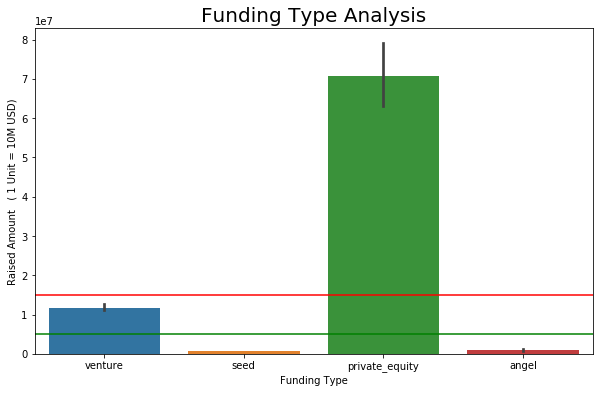

In [103]:
## plot showing the fraction of total investments (globally) in angel, venture, seed, and private equity,
## and the average amount of investment in each funding type

# bar plot with default statistic=mean
plt.figure(figsize=(10,6))
global_investment=sns.barplot(x='funding_round_type', y='raised_amount_usd', data=master_frame)

global_investment.set(xlabel='Funding Type', ylabel='Raised Amount   ( 1 Unit = 10M USD)')
global_investment.set_title('Funding Type Analysis',fontsize =20)

plt.axhline(5000000, color='green')
plt.axhline(15000000, color='red')


plt.show()

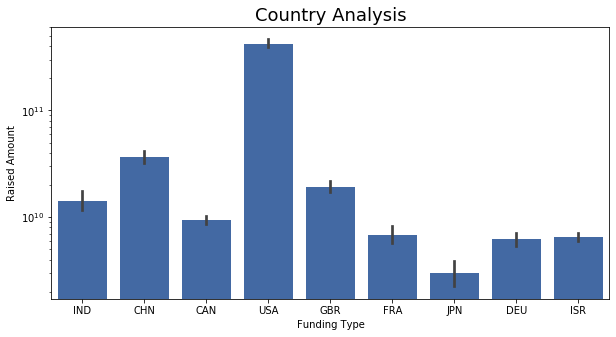

In [104]:
## Plot showing the top 9 countries against the total amount of investments of funding type FT. 
## Also the graph should show the top 3 countries (Country 1, Country 2, and Country 3) very clear.


# bar plot with default statistic=mean
plt.figure(figsize=(10,5))
graph_countries=sns.barplot(x='country_code', y='raised_amount_usd', data=top9, estimator=np.sum,color=(0.2, 0.4, 0.7, 0.6))
graph_countries.set_yscale('log')
graph_countries.set(xlabel='Funding Type', ylabel='Raised Amount')
graph_countries.set_title('Country Analysis',fontsize =18)
plt.show()

In [105]:
## A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart 
## for the chosen investment type i.e venture

## For this merging all 3 dataframes D1, D2 and D3 into one master data frame

master_Dataframe=D1[D1['main_sector'].isin(['Others','Social, Finance, Analytics, Advertising','Cleantech / Semiconductors'])]


In [106]:
master_Dataframe.shape

(8008, 16)

In [107]:
master_Dataframe=master_Dataframe.append(D2[D2['main_sector'].isin(['Others','Social, Finance, Analytics, Advertising','Cleantech / Semiconductors'])], ignore_index=True)


In [108]:
master_Dataframe=master_Dataframe.append(D3[D3['main_sector'].isin(['Others','Social, Finance, Analytics, Advertising','News, Search and Messaging'])], ignore_index=True)


In [109]:
master_Dataframe.shape

(8625, 16)

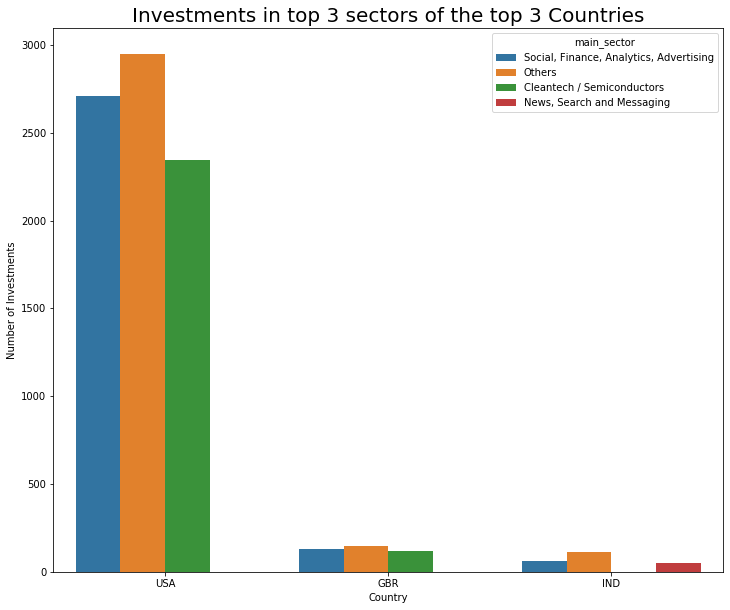

In [110]:
## Now ploting graph using master_Dataframe

plt.figure(num=None, figsize=(12, 10))

master_Dataframe=sns.barplot(x='country_code', y='raised_amount_usd', hue="main_sector",data=master_Dataframe,estimator=lambda x: len(x))
master_Dataframe.set(xlabel='Country', ylabel='Number of Investments')
master_Dataframe.set_title('Investments in top 3 sectors of the top 3 Countries',fontsize =20)
plt.show()

